<a href="https://colab.research.google.com/github/mohdrab01/Machine-Learning-Lab-Tasks/blob/main/ML_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Week 3 - 12-04-2021
# 18071A0591

# importing libraries

In [ ]:
import numpy as np
import pandas as pd

# 3. import  files  from google.colab

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My\ Drive/

/content/gdrive/My Drive


In [ ]:
import os
os.getcwd()

'/content/gdrive/My Drive'

# 1. load the dataset using  read CSV command 

In [ ]:
df = pd.read_csv(os.getcwd()+'/trees.csv')

In [ ]:
df.head()

,Index,"""Girth (in)""","""Height (ft)""","""Volume(ft^3)"""
0,1,8.3,70,10.3
1,2,8.6,65,10.3
2,3,8.8,63,10.2
3,4,10.5,72,16.4
4,5,10.7,81,18.8


In [ ]:
df = df.drop(columns=['Index'])

In [ ]:
df.head()

,"""Girth (in)""","""Height (ft)""","""Volume(ft^3)"""
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


In [ ]:
df.columns = ['width','height','volume']

In [ ]:
df.head()

,width,height,volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


# 2. Summarize the dataset 

In [ ]:
print(df.describe())

           width     height     volume
count  31.000000  31.000000  31.000000
mean   13.248387  76.000000  30.170968
std     3.138139   6.371813  16.437846
min     8.300000  63.000000  10.200000
25%    11.050000  72.000000  19.400000
50%    12.900000  76.000000  24.200000
75%    15.250000  80.000000  37.300000
max    20.600000  87.000000  77.000000


# 4. Apply  dataset.dropna

In [ ]:
df2 = pd.DataFrame({"name": ['person A', 'person B', 'person C'],
                   "address": [np.nan, 'India', 'US'],
                   "dob": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})

In [ ]:
df2.dropna().head() # Drop the rows where at least one element is missing.

,name,address,dob
1,person B,India,1940-04-25


In [ ]:
df2.dropna(axis='columns').head() # Drop the columns where at least one element is missing.

,name
0,person A
1,person B
2,person C


In [ ]:
df2.dropna(how='all').head() # Drop the rows where all elements are missing.

,name,address,dob
0,person A,NaN,NaT
1,person B,India,1940-04-25
2,person C,US,NaT


In [ ]:
df2.dropna(thresh=2).head() # Keep only the rows with at least 2 non-NA values.

,name,address,dob
1,person B,India,1940-04-25
2,person C,US,NaT


In [ ]:
df2.dropna(subset=['name', 'dob']).head() # Define in which columns to look for missing values.

,name,address,dob
1,person B,India,1940-04-25


In [ ]:
df2.dropna(inplace=True) #Keep the DataFrame with valid entries in the same variable.
df2.head()

,name,address,dob
1,person B,India,1940-04-25


# 5. fill missing values with mean column values

In [ ]:
marks = { 'S1': [10, 20, np.NaN, np.NaN],
                'S2': [5, np.NaN, np.NaN, 29],
                'S3': [15, np.NaN, np.NaN, 11],
                'S4': [21, 22, 23, 25],
                'Subjects': ['Maths', 'Physics', 'Chemistry', 'English']}

In [ ]:
df3 = pd.DataFrame(marks)

In [ ]:
df3

,S1,S2,S3,S4,Subjects
0,10.0,5.0,15.0,21,Maths
1,20.0,NaN,NaN,22,Physics
2,NaN,NaN,NaN,23,Chemistry
3,NaN,29.0,11.0,25,English


In [ ]:
df3 = df3.set_index('Subjects')

In [ ]:
df3

,S1,S2,S3,S4
Subjects,,,,
Maths,10.0,5.0,15.0,21
Physics,20.0,NaN,NaN,22
Chemistry,NaN,NaN,NaN,23
English,NaN,29.0,11.0,25


In [ ]:
m4 = df3['S4'].mean()
m4

22.75

In [ ]:
m1 = df3['S1'].mean()
m1

15.0

In [ ]:
m2 = df3['S2'].mean()
m2

17.0

In [ ]:
df3['S2'].fillna(value=df3['S2'].mean(), inplace=True)

In [ ]:
df3

,S1,S2,S3,S4
Subjects,,,,
Maths,10.0,5.0,15.0,21
Physics,20.0,17.0,NaN,22
Chemistry,NaN,17.0,NaN,23
English,NaN,29.0,11.0,25


In [ ]:
df3['S3'].fillna(value=df3['S3'].median(), inplace=True)
df3

,S1,S2,S3,S4
Subjects,,,,
Maths,10.0,5.0,15.0,21
Physics,20.0,17.0,13.0,22
Chemistry,NaN,17.0,13.0,23
English,NaN,29.0,11.0,25


In [ ]:
df3['S1'].fillna(value=df3['S1'].std(), inplace=True)
df3

,S1,S2,S3,S4
Subjects,,,,
Maths,10.000000,5.0,15.0,21
Physics,20.000000,17.0,13.0,22
Chemistry,7.071068,17.0,13.0,23
English,7.071068,29.0,11.0,25


In [ ]:
df3['S1'] = round(df3['S1'])
df3

,S1,S2,S3,S4
Subjects,,,,
Maths,10.0,5.0,15.0,21
Physics,20.0,17.0,13.0,22
Chemistry,7.0,17.0,13.0,23
English,7.0,29.0,11.0,25


# 6. Print the first  and last 10 rows of data

In [ ]:
df.head(10)

,width,height,volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


In [ ]:
df.tail(10)

,width,height,volume
21,14.2,80,31.7
22,14.5,74,36.3
23,16.0,72,38.3
24,16.3,77,42.6
25,17.3,81,55.4
26,17.5,82,55.7
27,17.9,80,58.3
28,18.0,80,51.5
29,18.0,80,51.0
30,20.6,87,77.0


# 7. count the number of missing values for each column


In [ ]:
df4 = pd.DataFrame(marks)
df4 = df4.set_index('Subjects')
df4

,S1,S2,S3,S4
Subjects,,,,
Maths,10.0,5.0,15.0,21
Physics,20.0,NaN,NaN,22
Chemistry,NaN,NaN,NaN,23
English,NaN,29.0,11.0,25


# 9. count the number of nan values in each column


In [ ]:
df4.isna().sum()

S1    2
S2    2
S3    2
S4    0
dtype: int64

In [ ]:
sum(list(df4.isna().sum()))


6

In [ ]:
df4.isna()

,S1,S2,S3,S4
Subjects,,,,
Maths,False,False,False,False
Physics,False,True,True,False
Chemistry,True,True,True,False
English,True,False,False,False


# 8. Replacing the 0 with nan and vice versa

In [ ]:
df4 = df4.fillna(0)
df4

,S1,S2,S3,S4
Subjects,,,,
Maths,10.0,5.0,15.0,21
Physics,20.0,0.0,0.0,22
Chemistry,0.0,0.0,0.0,23
English,0.0,29.0,11.0,25


In [ ]:
cols = ["S1","S2","S3","S4"]
df4[cols].astype(str).replace(['0',0,0.0,'0.0'],np.nan)

,S1,S2,S3,S4
Subjects,,,,
Maths,10.0,5.0,15.0,21
Physics,20.0,NaN,NaN,22
Chemistry,NaN,NaN,NaN,23
English,NaN,29.0,11.0,25


# 10. Random Sampling

In [ ]:
sample_df = df.sample(5)
sample_df

,width,height,volume
5,10.8,83,19.7
24,16.3,77,42.6
12,11.4,76,21.4
7,11.0,75,18.2
14,12.0,75,19.1


# Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size=0.4, random_state = 5)

In [ ]:
train

,width,height,volume
18,13.7,71,25.7
5,10.8,83,19.7
1,8.6,65,10.3
28,18.0,80,51.5
12,11.4,76,21.4
21,14.2,80,31.7
20,14.0,78,34.5
25,17.3,81,55.4
7,11.0,75,18.2
4,10.7,81,18.8


In [ ]:
test

,width,height,volume
17,13.3,86,27.4
30,20.6,87,77.0
24,16.3,77,42.6
23,16.0,72,38.3
13,11.7,69,21.3
10,11.3,79,24.2
2,8.8,63,10.2
29,18.0,80,51.0
27,17.9,80,58.3
26,17.5,82,55.7


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_true = ["a", "b", "a", "a", "b", "c"]
y_pred = ["b", "b", "a", "a", "b", "a"]
confusion_matrix(y_true, y_pred, labels=["b", "c", "a"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## 11.Demonstrate Stratified Sampling

##12. Demonstrate Preprocessing techniques

In [ ]:
# REFER ABOVE --- Preprocessing already done 
# Also refer below Regression example model

# 13. Demonstrate linear regression for employee salary data

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/GOVINDDIXIT/Salary-Predictor/master/Salary_Data.csv

--2021-04-20 06:02:11--  https://raw.githubusercontent.com/GOVINDDIXIT/Salary-Predictor/master/Salary_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 423 [text/plain]
Saving to: ‘Salary_Data.csv’

Salary_Data.csv     100%[===================>]     423  --.-KB/s    in 0s      

2021-04-20 06:02:11 (16.3 MB/s) - ‘Salary_Data.csv’ saved [423/423]



In [ ]:
# Importing the dataset
data = pd.read_csv('Salary_Data.csv')

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
data.size

60

In [ ]:
data.shape

(30, 2)

In [ ]:
print(data.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [ ]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [ ]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [ ]:
# Splitting the dataset into the Training set and Test set in ratio 80% : 20%
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(x_test)

In [ ]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

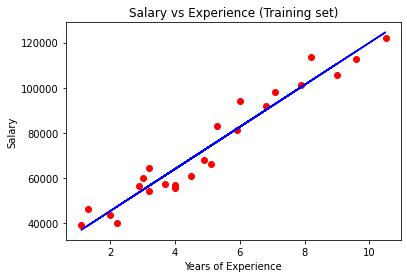

In [ ]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

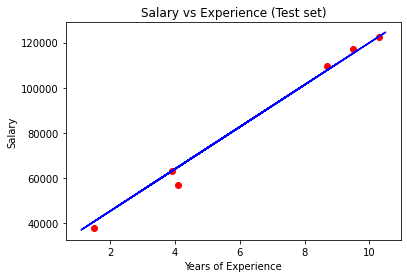

In [ ]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## 14. Demonstrate Decision Tree algorithm For given case studies 

In [ ]:
# SEE- ML-LAB 4 (i) and (ii)